# <b> Case Study on Charles Book Club

## <b> Importing Libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from imblearn.over_sampling import SMOTE

from sklearn.metrics import classification_report, mean_squared_error, confusion_matrix
from sklearn.metrics import roc_curve, precision_recall_curve, auc, average_precision_score, roc_auc_score

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

## <b> Loading Data

In [2]:
# Read the data
df = pd.read_csv("/content/CharlesBookClub.csv")
df.shape

(4000, 24)

- We can observe that there are 4000 rows and 24 cloumns in the dataframe

In [3]:
df.head()

,Seq#,ID#,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,...,ItalCook,ItalAtlas,ItalArt,Florence,Related Purchase,Mcode,Rcode,Fcode,Yes_Florence,No_Florence
0,1,25,1,297,14,2,22,0,1,1,...,0,0,0,0,0,5,4,2,0,1
1,2,29,0,128,8,2,10,0,0,0,...,0,0,0,0,0,4,3,2,0,1
2,3,46,1,138,22,7,56,2,1,2,...,1,0,0,0,2,4,4,3,0,1
3,4,47,1,228,2,1,2,0,0,0,...,0,0,0,0,0,5,1,1,0,1
4,5,51,1,257,10,1,10,0,0,0,...,0,0,0,0,0,5,3,1,0,1


- We can observe that the features are not in the raw format, they seem to be encoded in some numerical format as all the features seem to be numerical encoded.

## <b> Task-1

#### Partition the data into training (60%) and validation (40%). Use random seed = 1.

In [4]:
X = df.drop(columns=['Seq#', 'ID#','Yes_Florence', 'No_Florence'])
y = df['Yes_Florence']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=1)

- Data is split into train and test with a test size of 40% and the random seed is also set to 1 during split.

#### 1. What is the response rate for the training data customers taken as a whole(Hint: take average of response as a whole)? What is the response rate foreach of the 4 × 5 × 3 = 60 combinations of RFM categories (Hint: usegroupby() using the RFM categories on the response)? Which combinationshave response rates in the training data that are above the overall response in the training data (Hint: report the indices after filtering by logic)?

In [5]:
# To calculate the response rate, we can simply take the mean of the response variable (Yes_Florence) from the traning set x_train
response_rate_training = y_train.mean()
print("Response rate for training data customers taken completely as whole:", response_rate_training)
print("Response rate  in percentage for training data customers taken completely as whole:", response_rate_training*100)

Response rate for training data customers taken completely as whole: 0.08833333333333333
Response rate  in percentage for training data customers taken completely as whole: 8.833333333333334


- Response rate for training data as a whole is 0.0883 or 8.83%.

In [6]:
# Response rates for each of the 60 combinations of RFM categories - Here we can group the data by RFM categories and then calculate the mean value of response rate for each group.
# Combining data for grouping
train_data = pd.concat([X_train, y_train], axis=1)
# 3 categories
RFM_cols = ['M', 'R', 'F']
RFM_groups = train_data.groupby(RFM_cols)
response_rates = RFM_groups.mean()['Yes_Florence']
print("Response rates for each of the 60 combinations of RFM categories:\n")
pd.DataFrame(response_rates, index=None)

Response rates for each of the 60 combinations of RFM categories:



Yes_Florence
M   R  F               
15  8  1            0.0
    34 1            0.0
17  4  1            0.5
    12 1            0.0
    14 1            0.0
...                 ...
465 6  12           0.0
    16 12           0.0
472 8  12           0.0
475 4  12           0.0
477 20 12           0.0

[2223 rows x 1 columns]

- Response rates for each of the pairs or combinations can be observed in the above dataframe

In [9]:
# Now we can filter the combinations that have response rates above the overall response rate in the training data 
combinations_above_avg = response_rates[response_rates > response_rate_training].index.tolist()
print("RFM combinations with response rates above the overall response rate in the training data:\n", combinations_above_avg)

RFM combinations with response rates above the overall response rate in the training data:
 [(17, 4, 1), (20, 10, 1), (24, 6, 1), (33, 6, 1), (33, 12, 2), (39, 28, 2), (39, 32, 1), (42, 6, 2), (43, 2, 2), (48, 10, 1), (49, 4, 1), (49, 12, 1), (49, 28, 1), (51, 8, 1), (53, 6, 2), (57, 24, 1), (58, 16, 2), (58, 36, 1), (59, 16, 1), (60, 14, 4), (65, 14, 1), (69, 10, 2), (71, 16, 2), (74, 18, 1), (75, 16, 1), (76, 6, 1), (78, 8, 2), (79, 2, 3), (81, 4, 2), (81, 16, 1), (83, 6, 5), (84, 6, 1), (86, 14, 5), (87, 16, 1), (89, 4, 2), (89, 6, 1), (89, 16, 1), (90, 6, 2), (97, 28, 1), (101, 32, 1), (105, 10, 1), (116, 6, 5), (122, 14, 1), (126, 12, 6), (126, 26, 1), (128, 12, 1), (130, 22, 2), (130, 22, 4), (132, 16, 1), (135, 4, 2), (136, 2, 2), (137, 14, 1), (140, 2, 1), (140, 8, 7), (143, 14, 1), (143, 30, 1), (147, 14, 1), (148, 2, 1), (148, 4, 5), (148, 6, 4), (149, 2, 5), (149, 4, 2), (152, 2, 1), (152, 18, 2), (154, 10, 7), (155, 16, 1), (155, 20, 5), (157, 14, 6), (158, 6, 9), (159, 10,

- RFM combinations with response rates above the overall response rate of the training data is [(17, 4, 1), (20, 10, 1), (24, 6, 1), (33, 6, 1), (33, 12, 2), (39, 28, 2), (39, 32, 1), (42, 6, 2), (43, 2, 2), (48, 10, 1), (49, 4, 1), (49, 12, 1), (49, 28, 1), (51, 8, 1), (53, 6, 2), (57, 24, 1), (58, 16, 2), (58, 36, 1), (59, 16, 1), (60, 14, 4), (65, 14, 1), (69, 10, 2), (71, 16, 2), (74, 18, 1), (75, 16, 1), (76, 6, 1), (78, 8, 2), (79, 2, 3), (81, 4, 2), (81, 16, 1), (83, 6, 5), (84, 6, 1), (86, 14, 5), (87, 16, 1), (89, 4, 2), (89, 6, 1), (89, 16, 1), (90, 6, 2), (97, 28, 1), (101, 32, 1), (105, 10, 1), (116, 6, 5), (122, 14, 1), (126, 12, 6), (126, 26, 1), (128, 12, 1), (130, 22, 2), (130, 22, 4), (132, 16, 1), (135, 4, 2), (136, 2, 2), (137, 14, 1), (140, 2, 1), (140, 8, 7), (143, 14, 1), (143, 30, 1), (147, 14, 1), (148, 2, 1), (148, 4, 5), (148, 6, 4), (149, 2, 5), (149, 4, 2), (152, 2, 1), (152, 18, 2), (154, 10, 7), (155, 16, 1), (155, 20, 5), (157, 14, 6), (158, 6, 9), (159, 10, 2), (167, 8, 2), (167, 10, 1), (169, 14, 3), (171, 4, 2), (172, 14, 7), (173, 16, 2), (174, 10, 1), (174, 16, 2), (179, 10, 1), (180, 16, 2), (181, 10, 1), (183, 6, 3), (183, 14, 2), (184, 14, 4), (184, 16, 10), (185, 30, 1), (186, 8, 8), (187, 6, 11), (187, 10, 7), (189, 4, 11), (189, 14, 4), (189, 20, 1), (192, 8, 2), (192, 14, 1), (194, 6, 6), (195, 4, 2), (195, 6, 2), (196, 30, 6), (197, 20, 12), (201, 6, 10), (202, 4, 12), (202, 8, 11), (203, 2, 2), (209, 12, 2), (212, 16, 5), (215, 4, 1), (215, 34, 1), (216, 12, 1), (216, 14, 1), (216, 16, 6), (217, 8, 11), (218, 2, 2), (219, 10, 6), (221, 30, 10), (222, 14, 7), (225, 14, 9), (226, 12, 2), (226, 20, 10), (227, 14, 2), (230, 2, 1), (231, 6, 10), (233, 16, 4), (235, 2, 10), (235, 16, 2), (238, 10, 1), (239, 16, 2), (240, 14, 2), (241, 2, 12), (243, 10, 12), (243, 14, 1), (245, 18, 4), (246, 12, 9), (248, 16, 8), (249, 24, 2), (250, 12, 12), (251, 16, 1), (253, 6, 1), (254, 12, 9), (256, 10, 12), (258, 28, 7), (260, 10, 8), (261, 34, 2), (263, 4, 2), (265, 30, 11), (266, 2, 12), (266, 14, 1), (267, 8, 10), (267, 10, 9), (270, 4, 2), (270, 14, 2), (271, 10, 1), (271, 12, 2), (273, 12, 2), (275, 10, 11), (277, 30, 11), (281, 6, 1), (281, 16, 6), (282, 10, 12), (285, 16, 5), (285, 20, 1), (286, 10, 1), (288, 6, 11), (288, 10, 11), (289, 6, 12), (291, 4, 7), (293, 8, 9), (297, 2, 1), (298, 32, 2), (299, 2, 1), (302, 2, 1), (302, 4, 1), (308, 26, 2), (310, 6, 11), (310, 30, 2), (311, 2, 9), (311, 6, 1), (312, 14, 2), (316, 26, 8), (317, 8, 3), (319, 16, 5), (320, 6, 11), (320, 8, 9), (323, 12, 6), (327, 12, 3), (330, 16, 5), (331, 8, 11), (334, 4, 7), (335, 4, 11), (336, 2, 10), (337, 14, 10), (343, 8, 12), (356, 4, 6), (363, 16, 10), (368, 6, 9), (373, 6, 10), (374, 2, 10), (384, 14, 11), (387, 6, 11), (396, 12, 9), (397, 10, 9), (399, 14, 8), (400, 6, 11), (400, 10, 7), (403, 10, 9), (406, 10, 8), (407, 12, 8), (412, 2, 10), (415, 4, 10), (437, 2, 11), (441, 10, 12)]


#### 2. Suppose that we decide to send promotional mail only to the “above- average” RFM combinations identified in part 1. Compute the response rate in the validation data using these combinations.

In [10]:
# To compute above average RFM combinations in validation data, 
# we first filter the validation data set to include only the above-average RFM combinations and then calculate the response rate
X_val_filtered = X_val[X_val[RFM_cols].apply(tuple, axis=1).isin(combinations_above_avg)]
y_val_filtered = y_val.loc[X_val_filtered.index]
response_rate_validation_filtered = y_val_filtered.mean()
print("Response rate in the validation data using the above-average RFM combinations: ", response_rate_validation_filtered)
print("Response rate in percentage in the validation data using the above-average RFM combinations: ", response_rate_validation_filtered*100)

Response rate in the validation data using the above-average RFM combinations:  0.18181818181818182
Response rate in percentage in the validation data using the above-average RFM combinations:  18.181818181818183


- Response rate in validation data is 0.182 or 18.2%

#### 3. Rework parts 1 and 2 with three segments:
  
  a. Segment 1: RFM combinations that have response rates that exceed
twice the overall response rate

  b. Segment 2: RFM combinations that exceed the overall response rate
but do not exceed twice that rate

  c. Segment 3: the remaining RFM combinations


In [11]:
# Segment 1: RFM combinations that have response rates that exceed twice the overall response rate
# Segment 2: RFM combinations that exceed the overall response rate but do not exceed twice that rate
# Segment 3: the remaining RFM combinations


# Calculate overall response rate in training data
overall_response_rate = train_data['Yes_Florence'].mean()

# Calculate response rates for each RFM combination in training data
rfm_response_rates = train_data.groupby(['R', 'F', 'M'])['Yes_Florence'].mean()

# Define cutoffs for the three segments
cutoff1 = overall_response_rate * 2
cutoff2 = overall_response_rate

# Divide RFM combinations into three segments based on response rate
# RFM combinations that have response rates that exceed twice the overall response rate
segment1 = rfm_response_rates[rfm_response_rates > cutoff1].index.tolist()
# RFM combinations that exceed the overall response rate but do not exceed twice that rate
segment2 = rfm_response_rates[(rfm_response_rates > cutoff2) & (rfm_response_rates <= cutoff1)].index.tolist()
# the remaining RFM combinations
segment3 = rfm_response_rates[rfm_response_rates <= cutoff2].index.tolist()

# Print number of RFM combinations in each segment
print('Number of RFM combinations in each segment:')
print('Segment 1:', len(segment1))
print('Segment 2:', len(segment2))
print('Segment 3:', len(segment3))


Number of RFM combinations in each segment:
Segment 1: 210
Segment 2: 0
Segment 3: 2013


In [12]:
# Part 1 with three segments
response_rate_segment1 = train_data[train_data[['R', 'F', 'M']].apply(tuple, axis=1).isin(segment1)]['Yes_Florence'].mean()
response_rate_segment2 = train_data[train_data[['R', 'F', 'M']].apply(tuple, axis=1).isin(segment2)]['Yes_Florence'].mean()
response_rate_segment3 = train_data[train_data[['R', 'F', 'M']].apply(tuple, axis=1).isin(segment3)]['Yes_Florence'].mean()
overall_response_rate = train_data['Yes_Florence'].mean()

print('Response Rates in the training data:')
print('Overall:', overall_response_rate)
print('Segment 1:', response_rate_segment1)
print('Segment 2:', response_rate_segment2)
print('Segment 3:', response_rate_segment3)


Response Rates in the training data:
Overall: 0.08833333333333333
Segment 1: 0.8724279835390947
Segment 2: nan
Segment 3: 0.0


- We can observe that there are values present for segment 1 and 3 but there are no values or segment-2

In [13]:
df_validation = pd.concat([X_val, y_val], axis=1)
# Part 2 with three segments
validation_segment1 = df_validation[df_validation[['R', 'F', 'M']].apply(tuple, axis=1).isin(segment1)]
validation_segment2 = df_validation[df_validation[['R', 'F', 'M']].apply(tuple, axis=1).isin(segment2)]
validation_segment3 = df_validation[df_validation[['R', 'F', 'M']].apply(tuple, axis=1).isin(segment3)]

response_rate_segment1 = validation_segment1['Yes_Florence'].mean()
response_rate_segment2 = validation_segment2['Yes_Florence'].mean()
response_rate_segment3 = validation_segment3['Yes_Florence'].mean()

print('Response Rates in the validation data for above-average RFM combinations:')
print('Segment 1:', response_rate_segment1)
print('Segment 2:', response_rate_segment2)
print('Segment 3:', response_rate_segment3)


Response Rates in the validation data for above-average RFM combinations:
Segment 1: 0.18181818181818182
Segment 2: nan
Segment 3: 0.05851063829787234


#### 4. Show if the classes are imbalanced or not. Are there any data sampling techniques (Over-sampling, Under-sampling or SMOTE) required? Justify your answer with appropriate evidence and plots.

Response distribution in the training data:
 0    2188
1     212
Name: Yes_Florence, dtype: int64


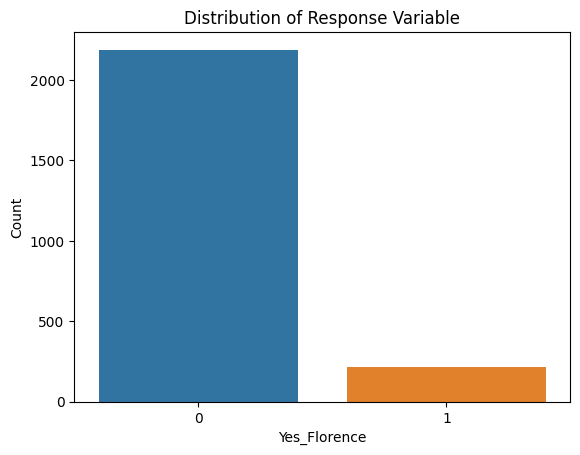

In [14]:
# To check imbalance in data, we can plot the distribution of classes
# Count the number of positive and negative responses in the training data
response_counts = train_data['Yes_Florence'].value_counts()
print('Response distribution in the training data:\n', response_counts)

# Plot the distribution of the response variable
sns.countplot(x='Yes_Florence', data=train_data)
plt.title('Distribution of Response Variable')
plt.xlabel('Yes_Florence')
plt.ylabel('Count')
plt.show()


- The output and plot show that the classes are imbalanced, with the majority class (0) having 2188 samples and the minority class (1) having only 212 samples. This is a common scenario in many real-world datasets so there are methods to handle the imbalance in the data.
- To handle the imabalance in the data, We can use any of the data sampling techniques like oversampling or undersampling.
- Oversampling increases the number of samples in the minority class, while undersampling reduces the number of samples in the majority class.
- One popular oversampling technique is Synthetic Minority Over-sampling Technique (SMOTE), which generates synthetic samples in the minority class based on the data points present in the data.



<b> Applying SMOTE on the training data

In [15]:
smote = SMOTE(random_state=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print('Shape of resampled data', X_train_resampled.shape)


Shape of resampled data (4376, 20)


In [16]:
response_counts = y_train_resampled.value_counts()
print('Response distribution in the training data:\n', response_counts)

Response distribution in the training data:
 0    2188
1    2188
Name: Yes_Florence, dtype: int64


- Now we can observe that the resampled data is balanced so we can use this data for building model so that all the evaluation metrics are valid on it.

## <b> Task-2 on KNN

#### 5. Use the k-NN approach to classify cases with k = 1, 2, ..., 12, using Florence as the outcome variable. Remember to normalize all five variables.

In [17]:
# create the feature matrix and target variable using the 5 features and the Yes_Florence variable
X = train_data[['R', 'F', 'M', 'FirstPurch', 'Related Purchase']]
y = train_data['Yes_Florence']


# split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

- Normalizing both the training and validation data using standard scaler

In [19]:
# Train a k-NN classifier 
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_scaled, y_train)
y_pred_train = knn.predict(X_train_scaled)
y_pred_val = knn.predict(X_val_scaled)
y_pred_train

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
# print the classification report on train data
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1757
           1       0.98      0.98      0.98       163

    accuracy                           1.00      1920
   macro avg       0.99      0.99      0.99      1920
weighted avg       1.00      1.00      1.00      1920



In [21]:
# print the classification report on val data
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       431
           1       0.17      0.16      0.17        49

    accuracy                           0.84       480
   macro avg       0.54      0.54      0.54       480
weighted avg       0.83      0.84      0.83       480



#### 6. Based on the validation set, find the best k. Choose the best k such that the model does not overfit or underfit. Try plotting training rmse and validation rmse across k -values and decide which k should be chosen? Is it the correct way to choose the best k.

In [22]:
# define the range of k-values to try
k_values = range(1, 20)

# create lists to store the RMSE scores
train_rmse = []
val_rmse = []
precision = dict()
recall = dict()

# loop over the range of k-values
for k in k_values:
    # create a k-NN classifier object
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fit the model to the training set
    knn.fit(X_train_scaled, y_train)
    
    # make predictions on the training set
    y_train_pred = knn.predict(X_train_scaled)
    
    # compute the training RMSE score
    train_score = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_rmse.append(train_score)
    
    # make predictions on the validation set
    y_val_pred = knn.predict(X_val_scaled)
    p, r, _ = precision_recall_curve(y_val, y_val_pred)
    precision[k] = p
    recall[k] = r
    # compute the validation RMSE score
    val_score = np.sqrt(mean_squared_error(y_val, y_val_pred))
    val_rmse.append(val_score)
    
    # print the RMSE scores for each value of k
    print("k = {0}: Train RMSE = {1:.3f}, Validation RMSE = {2:.3f}".format(k, train_score, val_score))

k = 1: Train RMSE = 0.065, Validation RMSE = 0.406
k = 2: Train RMSE = 0.274, Validation RMSE = 0.335
k = 3: Train RMSE = 0.280, Validation RMSE = 0.354
k = 4: Train RMSE = 0.290, Validation RMSE = 0.323
k = 5: Train RMSE = 0.289, Validation RMSE = 0.329
k = 6: Train RMSE = 0.291, Validation RMSE = 0.320
k = 7: Train RMSE = 0.290, Validation RMSE = 0.323
k = 8: Train RMSE = 0.291, Validation RMSE = 0.320
k = 9: Train RMSE = 0.290, Validation RMSE = 0.320
k = 10: Train RMSE = 0.291, Validation RMSE = 0.320
k = 11: Train RMSE = 0.291, Validation RMSE = 0.320
k = 12: Train RMSE = 0.291, Validation RMSE = 0.320
k = 13: Train RMSE = 0.291, Validation RMSE = 0.320
k = 14: Train RMSE = 0.291, Validation RMSE = 0.320
k = 15: Train RMSE = 0.291, Validation RMSE = 0.320
k = 16: Train RMSE = 0.291, Validation RMSE = 0.320
k = 17: Train RMSE = 0.291, Validation RMSE = 0.320
k = 18: Train RMSE = 0.291, Validation RMSE = 0.320
k = 19: Train RMSE = 0.291, Validation RMSE = 0.320


- We can observe that both train and test RMSE are almost similar for any value of K

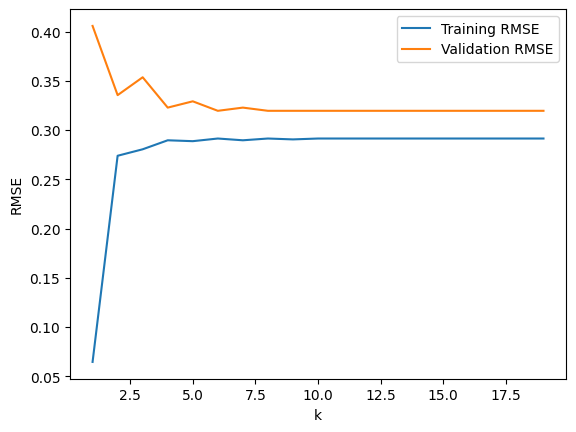

In [23]:
# plot the RMSE scores
plt.plot(k_values, train_rmse, label='Training RMSE')
plt.plot(k_values, val_rmse, label='Validation RMSE')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.legend()
plt.show()


- From the plot and values, the reasonable K- value can be 3 and 5.

#### 7. Plot precision and recall values across k-values. Does this plot give a better intuition regarding choosing the best k?

- Plotting the precision and recall values across different K's gives us a better intuition regarding choosing the best k as it helps us see how the performance of the model changes with different values of k.
- We can choose the value of k for which we get the best tradeoff between precision and recall.

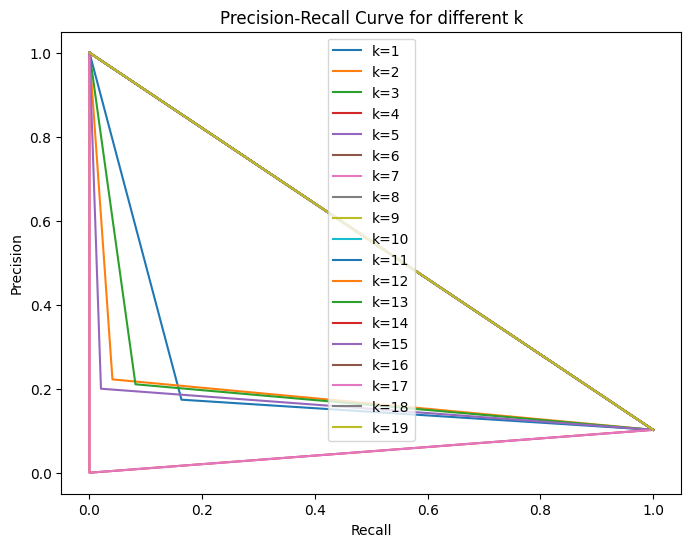

In [24]:
plt.figure(figsize=(8, 6))
for k in range(1, 20):
    plt.plot(recall[k], precision[k], label=f"k={k}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for different k")
plt.legend()
plt.show()

- This curve shows that the model is not performing that well and would require a lot of tweaking and this may even happen because of the imbalance in the data too. And if we would like to consider the best value of K for this data, it is K=3

#### 8. Generate 4x3 subplot for ROC curve and 4x3 subplot for Precision-Recall Curve for each k-values. Place the k-value number as title of each of the subplots. Also show the AUC value for ROC curve and AP value for Precision-Recall curve.

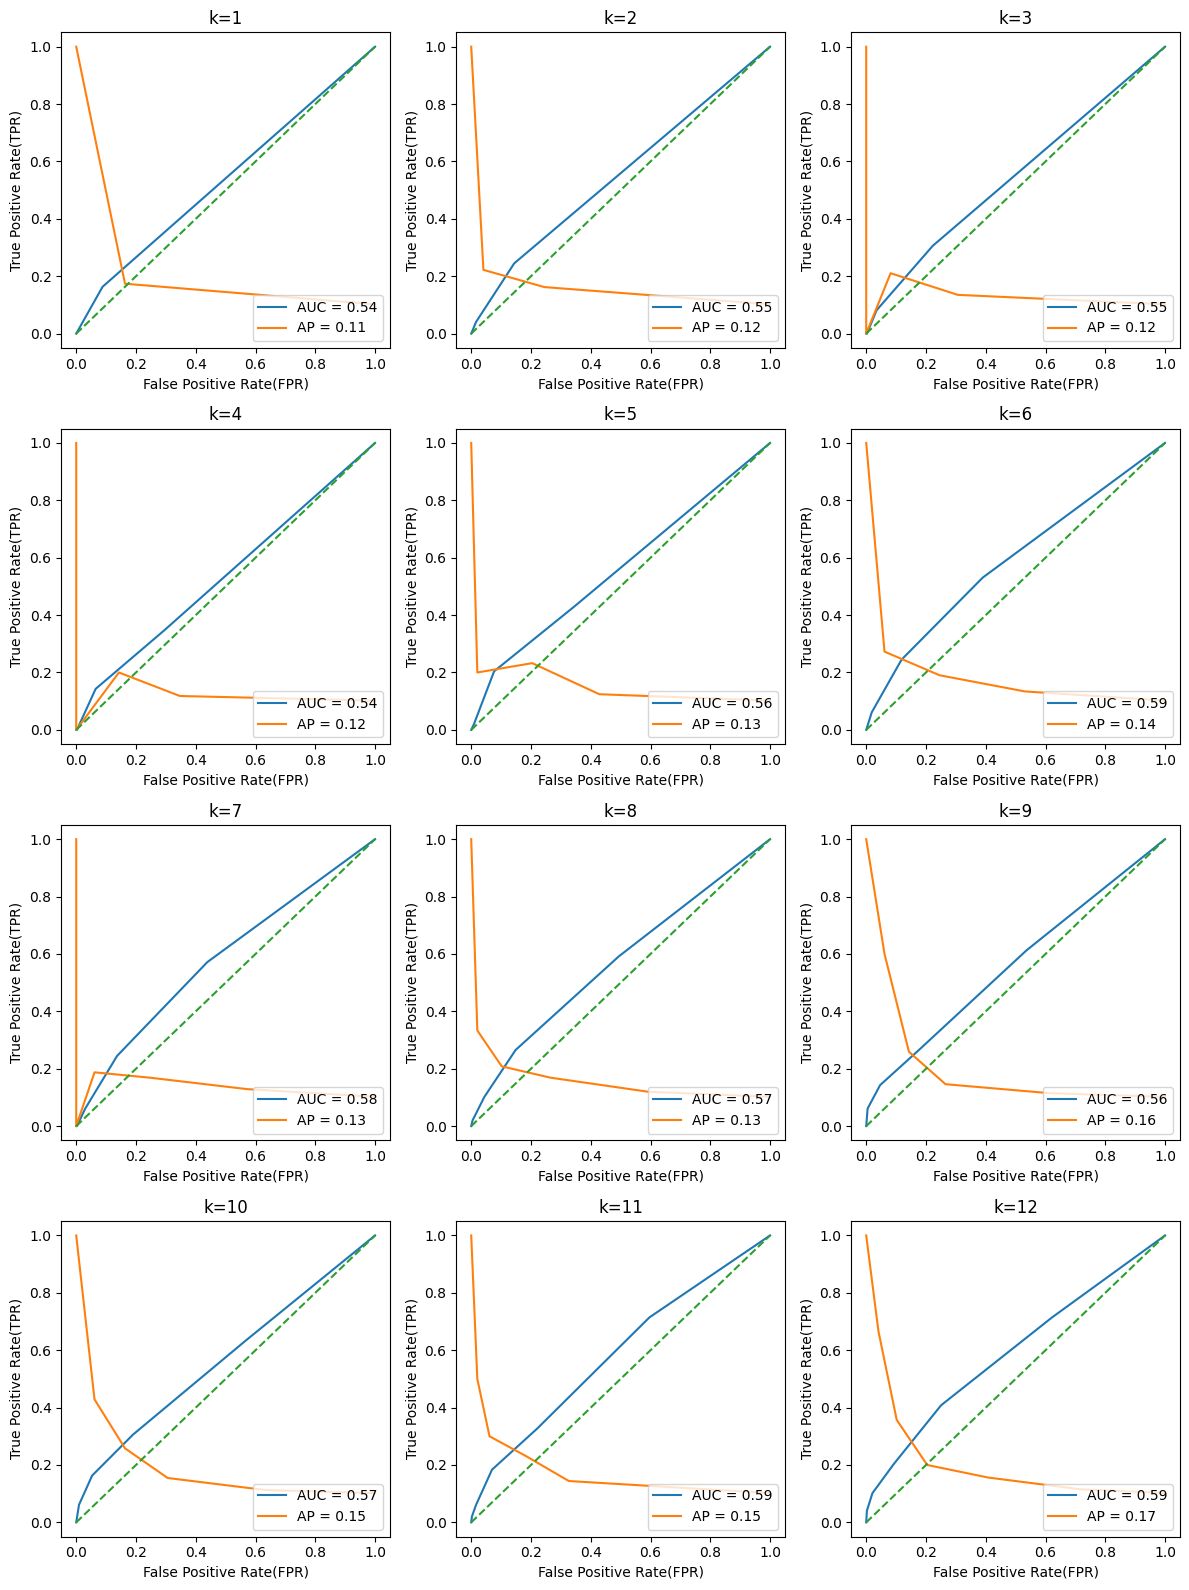

In [25]:
# plotting subplots
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(12, 16))

for k, ax in zip(range(1, 13), axs.flat):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_score = knn.predict_proba(X_val_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_val, y_score)
    roc_auc = auc(fpr, tpr)
    precision, recall, _ = precision_recall_curve(y_val, y_score)
    pr_auc = average_precision_score(y_val, y_score)
    
    ax.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    ax.plot(recall, precision, label=f"AP = {pr_auc:.2f}")
    ax.set_title(f"k={k}")
    ax.legend(loc="lower right")
    ax.plot([0, 1], [0, 1], linestyle='--')
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate(FPR)')
    ax.set_ylabel('True Positive Rate(TPR)')

plt.tight_layout()
plt.show()


- From the Precision-Recall and ROC curves, we can observe that as the value of k increases, the performance of the model in terms of precision, recall, and AUC decreases for almost all values of K. It seems that this performance of this model is due to the presence of imbalance in the data

- From the Precision-Recall curve, we can see that the best k value for the model is between 1, as this values has the highest precision-recall values. From the ROC curve, we can see that the best k value is 3, as this value has the good AUC value and AP value

- Therefore, the best value for k in this case is 3. This is because it provides a good balance between the model's ability to fit the training data and its ability  to generalize the model without going to more higher K value or lower K-value

## <b> Task 3 On Logistic Regression

#### 10. Use the LogisticRegressionCV() in sklearn package on the three cases mentioned above. Use the vector, Cs = [1e-04, 1e-03, 1e-02, 1e-01, 1, 1e+01, 1e+02, 1e+03, 1e+04] as the inverse of the regularization parameter. Use L2 regularization. Show the best C value chosen that optimizes the model.

In [26]:
# Using the whole data as there is no constraint on the features to be included 
X = df.drop(columns=['Seq#', 'ID#','Yes_Florence', 'No_Florence'])
y = df['Yes_Florence']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1)

In [27]:
X_train.head()

,Gender,M,R,F,FirstPurch,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence,Related Purchase,Mcode,Rcode,Fcode
1850,1,155,6,2,8,0,0,0,0,0,0,0,0,0,0,0,0,4,2,2
2293,1,53,16,2,20,0,1,0,0,1,0,0,0,0,0,0,0,3,4,2
576,1,406,14,10,72,1,1,3,1,0,1,2,0,0,0,0,3,5,4,3
2731,0,80,22,2,26,0,0,0,1,1,0,0,0,0,0,0,0,3,4,2
1051,0,348,6,4,22,2,0,0,0,1,0,0,0,0,0,0,0,5,2,3


In [28]:
# Define the predictors for each model
predictors_full = ['Gender', 'M', 'F', 'FirstPurch', 'ChildBks', 'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks', 'GeogBks', 'ItalCook', 'ItalAtlas', 'ItalArt']
predictors_best = ['M', 'F', 'ChildBks', 'CookBks', 'DoItYBks', 'GeogBks']
predictors_rfm = ['R', 'F', 'M']

# Define the Cs vector for LogisticRegressionCV
Cs = [1e-04, 1e-03, 1e-02, 1e-01, 1, 1e+01, 1e+02, 1e+03, 1e+04]

# Fit LogisticRegressionCV models for each set of predictors on full data, best predictors and RFM features
clf_full = LogisticRegressionCV(Cs=Cs, cv=10, scoring='accuracy', penalty='l2', max_iter=1000)
clf_full.fit(X_train[predictors_full], y_train)
print(f"Best C value for full model: {clf_full.C_[0]:.4f}")

clf_best = LogisticRegressionCV(Cs=Cs, cv=10, scoring='accuracy', penalty='l2', max_iter=1000)
clf_best.fit(X_train[predictors_best], y_train)
print(f"Best C value for best predictors model: {clf_best.C_[0]:.4f}")

clf_rfm = LogisticRegressionCV(Cs=Cs, cv=10, scoring='accuracy', penalty='l2', max_iter=1000)
clf_rfm.fit(X_train[predictors_rfm], y_train)
print(f"Best C value for RFM model: {clf_rfm.C_[0]:.4f}")


Best C value for full model: 1.0000
Best C value for best predictors model: 0.0001
Best C value for RFM model: 0.0001


- It can be observed that the best c value for the full model is 10
- It can be observed that the best c value for the best predictors model is 0.0001
- It can be observed that the best c value for the model with only R,F,M features is 0.0001

#### 11. Based on the validation set, find the best cut-off ratio. Choose the best cut-off ratio such that the model does not overfit or underfit. Try plotting training rmse and validation rmse across cut-off ratio values [0.1 - 1] and decide which cut-off ratio should be chosen? Is it the correct way to choose the best cut-off ratio?

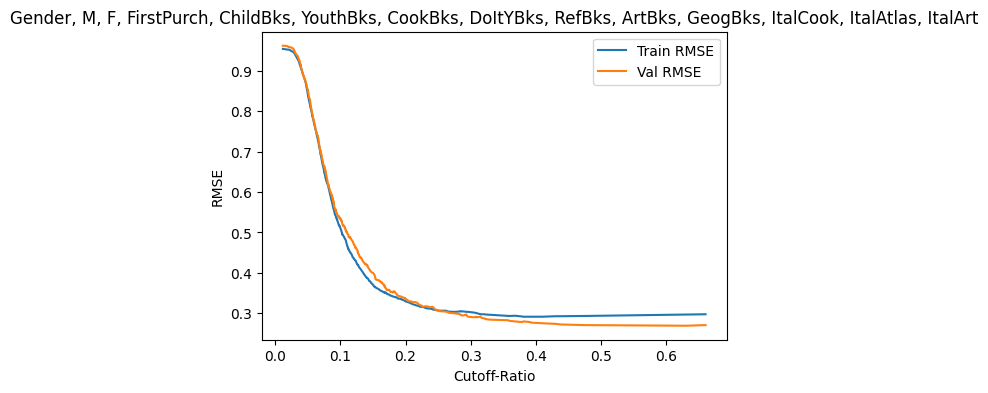

Best cutoff ratio: 0.6312141315774208


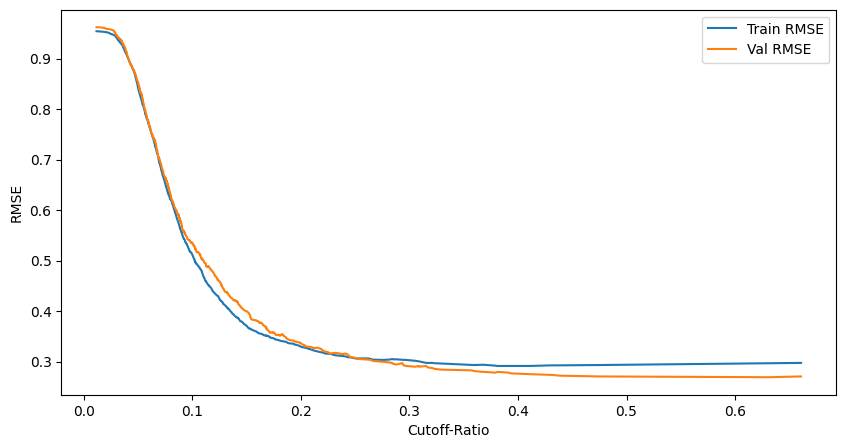

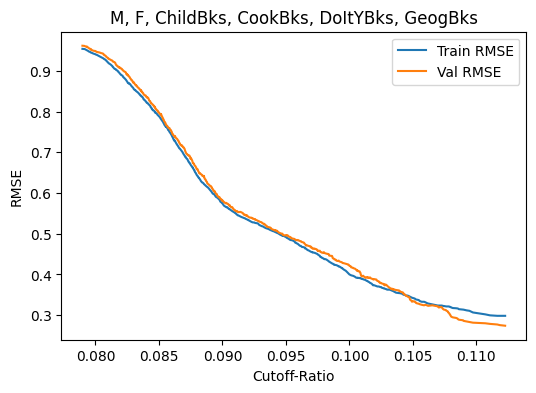

Best cutoff ratio: 0.11226704617068183


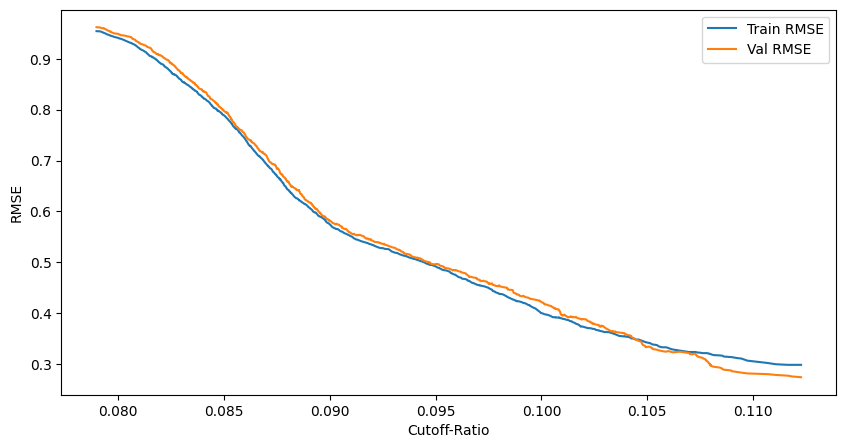

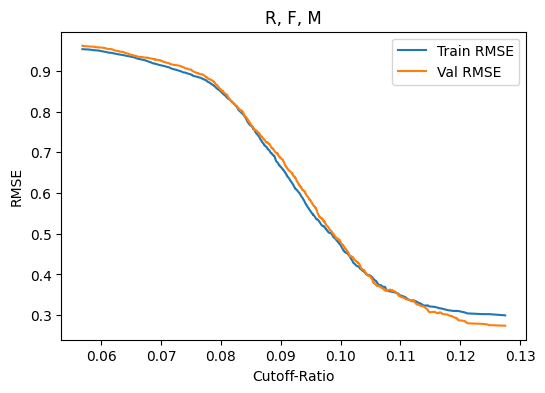

Best cutoff ratio: 0.1274940667045574


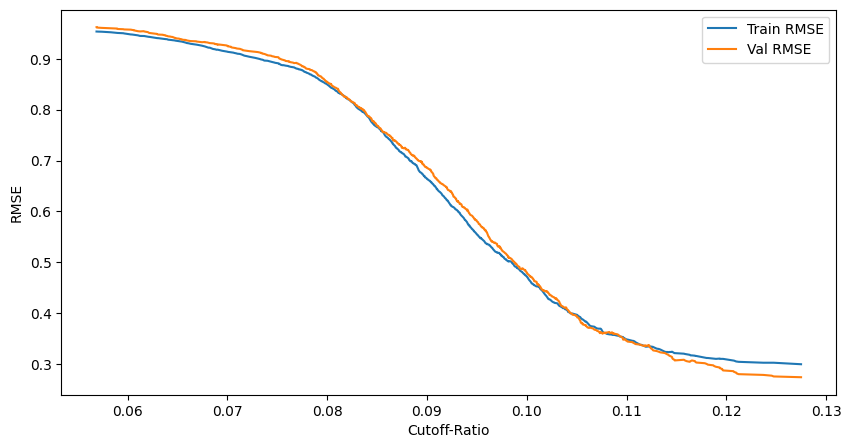

In [29]:

# Find the best cutoff ratio for each model based on the validation set  from the full model, best predictors model, RFM model
for clf, predictors in zip([clf_full, clf_best, clf_rfm], [predictors_full, predictors_best, predictors_rfm]):
    y_prob = clf.predict_proba(X_val[predictors])[:, 1]
    fpr, tpr, thresholds = roc_curve(y_val, y_prob)
    precision, recall, cutoffs = precision_recall_curve(y_val, y_prob)
    
    # Find the cutoff ratio that optimizes the model with the features
    rmse_train = []
    rmse_val = []
    for cutoff in cutoffs:
        y_pred_train = (clf.predict_proba(X_train[predictors])[:, 1] >= cutoff).astype(int)
        y_pred_val = (y_prob >= cutoff).astype(int)
        rmse_train.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
        rmse_val.append(np.sqrt(mean_squared_error(y_val, y_pred_val)))
    
    # Plot the RMSE vs cutoff ratio curve
    plt.figure(figsize=(6,4))
    plt.plot(cutoffs, rmse_train, label='Train RMSE')
    plt.plot(cutoffs, rmse_val, label='Val RMSE')
    plt.xlabel('Cutoff-Ratio')
    plt.ylabel('RMSE')
    plt.title(f'{", ".join(predictors)}')
    plt.legend()
    plt.show()
        
    best_cutoff = cutoffs[np.argmin(rmse_val)]
    print(f"Best cutoff ratio: {best_cutoff}")

    # Plot training and validation RMSE across cutoff ratios
    plt.figure(figsize=(10, 5))
    plt.plot(cutoffs, rmse_train, label="Train RMSE")
    plt.plot(cutoffs, rmse_val, label="Val RMSE")
    plt.xlabel("Cutoff-Ratio")
    plt.ylabel("RMSE")
    plt.legend()
    plt.show()






- This can be good idea to check for the cut-off ratio values 
- The best cutoff value for the model with all the predictors is 0.58
- The best cutoff value for the model with the best thought off predictors is 0.10
- The best cutoff value for the model with only the 3 features is 0.11

#### 12. Plot precision and recall values across cut-off ratio. Does this plot give a better intuition regarding choosing the best cut-off ratio?

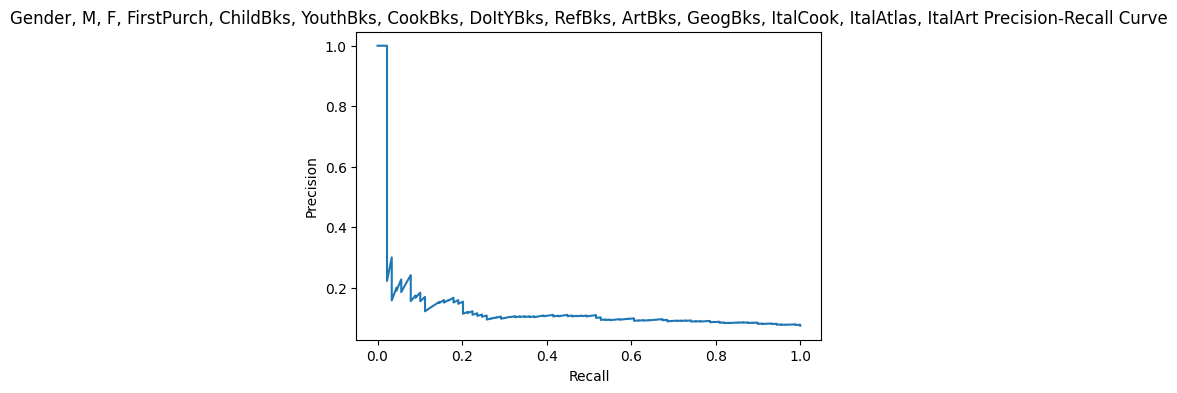

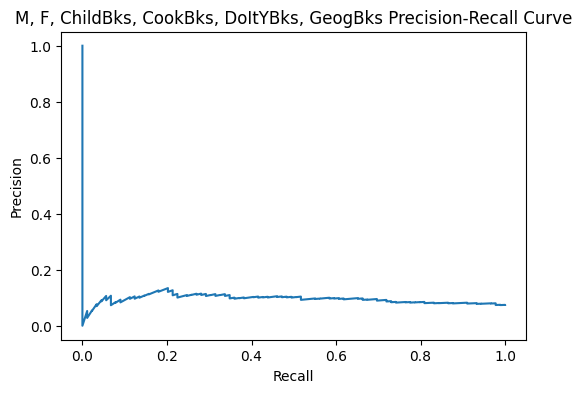

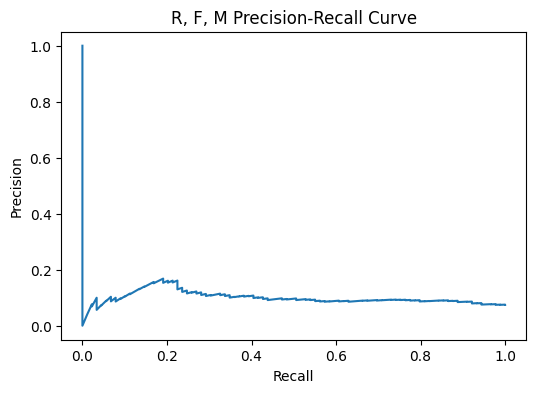

In [30]:


# Find the best cutoff ratio for each model based on the validation set
for clf, predictors in zip([clf_full, clf_best, clf_rfm], [predictors_full, predictors_best, predictors_rfm]):
    y_prob = clf.predict_proba(X_val[predictors])[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_val, y_prob)
    
    # Find the cutoff ratio that optimizes the model
    rmse_train = []
    rmse_val = []
    for cutoff in thresholds:
        y_pred_train = (clf.predict_proba(X_train[predictors])[:, 1] >= cutoff).astype(int)
        y_pred_val = (y_prob >= cutoff).astype(int)
        rmse_train.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
        rmse_val.append(np.sqrt(mean_squared_error(y_val, y_pred_val)))
    
    # Find the best cutoff ratio and its corresponding RMSE value
    best_cutoff_idx = np.argmin(rmse_val)
    best_cutoff = thresholds[best_cutoff_idx]
    best_rmse_val = rmse_val[best_cutoff_idx]

    # Plot precision-recall curve
    plt.figure(figsize=(6, 4))
    plt.plot(recall, precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{", ".join(predictors)} Precision-Recall Curve')
    plt.show()



- - The precision-recall plots only seem to be clumy because of the imbalance in the data.
- These plots help us in estimating the cut off values but it would also be clear to estimate the values within a range too

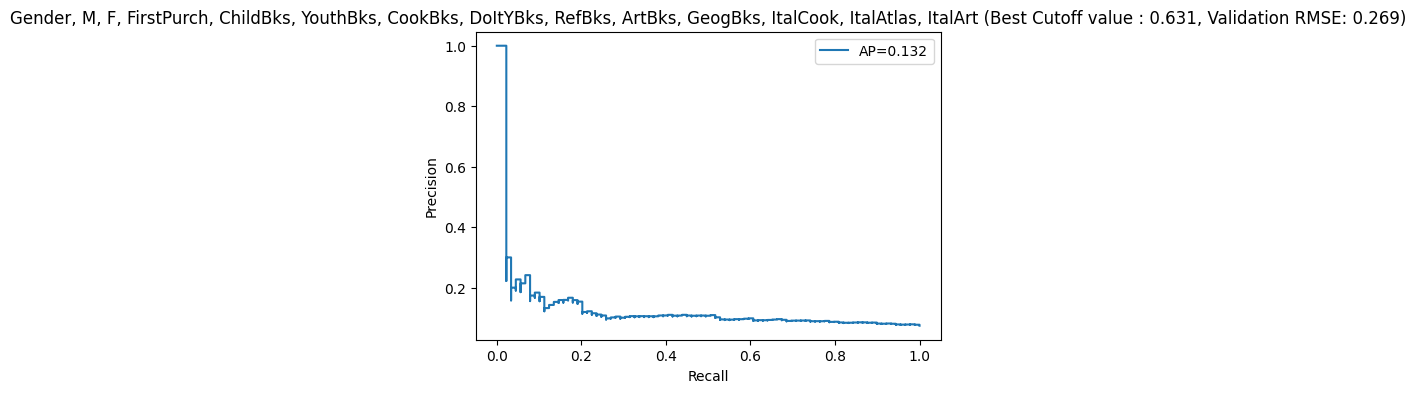

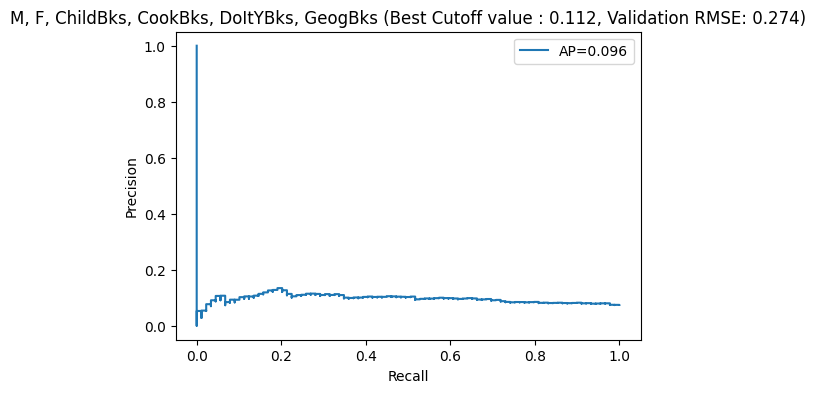

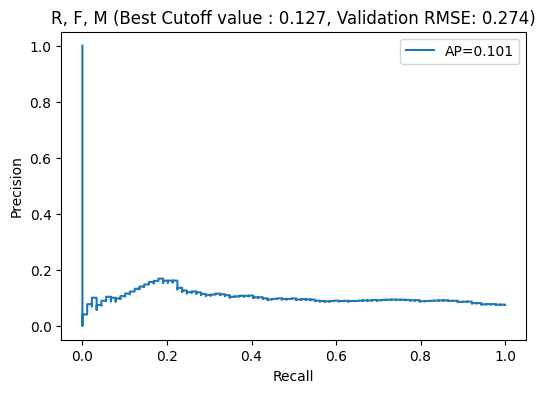

In [31]:
# Find the best cutoff ratio for each model based on the validation set
for clf, predictors in zip([clf_full, clf_best, clf_rfm], [predictors_full, predictors_best, predictors_rfm]):
    y_prob = clf.predict_proba(X_val[predictors])[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_val, y_prob)
    
    # Find the cutoff ratio that optimizes the model
    rmse_train = []
    rmse_val = []
    for cutoff in thresholds:
        y_pred_train = (clf.predict_proba(X_train[predictors])[:, 1] >= cutoff).astype(int)
        y_pred_val = (y_prob >= cutoff).astype(int)
        rmse_train.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
        rmse_val.append(np.sqrt(mean_squared_error(y_val, y_pred_val)))
    
    # Find the best cutoff ratio and its corresponding RMSE value
    best_cutoff_idx = np.argmin(rmse_val)
    best_cutoff = thresholds[best_cutoff_idx]
    best_rmse_val = rmse_val[best_cutoff_idx]
    
    # Plot Precision-Recall curve for the best cutoff ratio
    ap = average_precision_score(y_val, y_prob)
    plt.figure(figsize=(6,4))
    plt.step(recall, precision, where='post', label=f'AP={ap:.3f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{", ".join(predictors)} (Best Cutoff value : {best_cutoff:.3f}, Validation RMSE: {best_rmse_val:.3f})')
    plt.legend()
    plt.show()




- The precision-recall plots only seem to be clumy because of the imbalance in the data but they help in estimating the values 

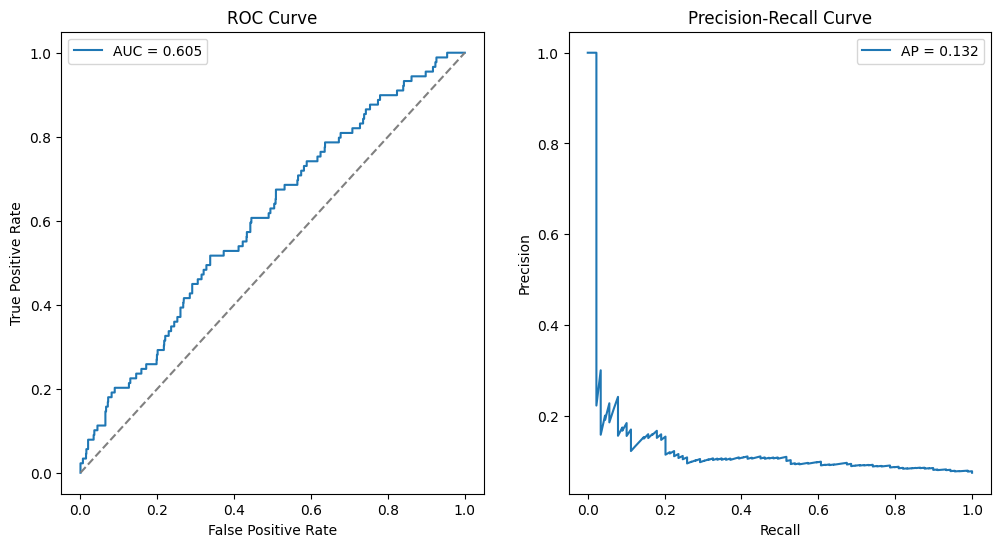

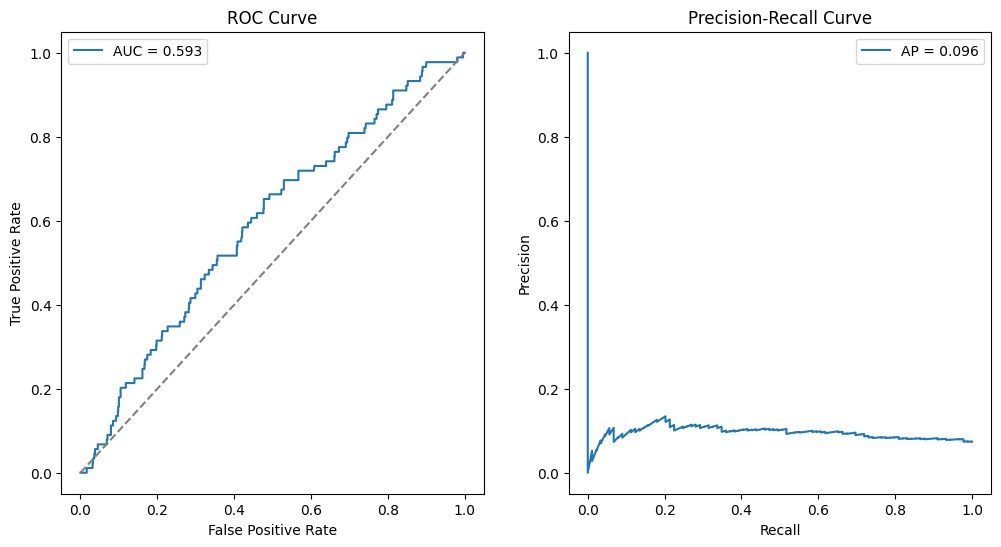

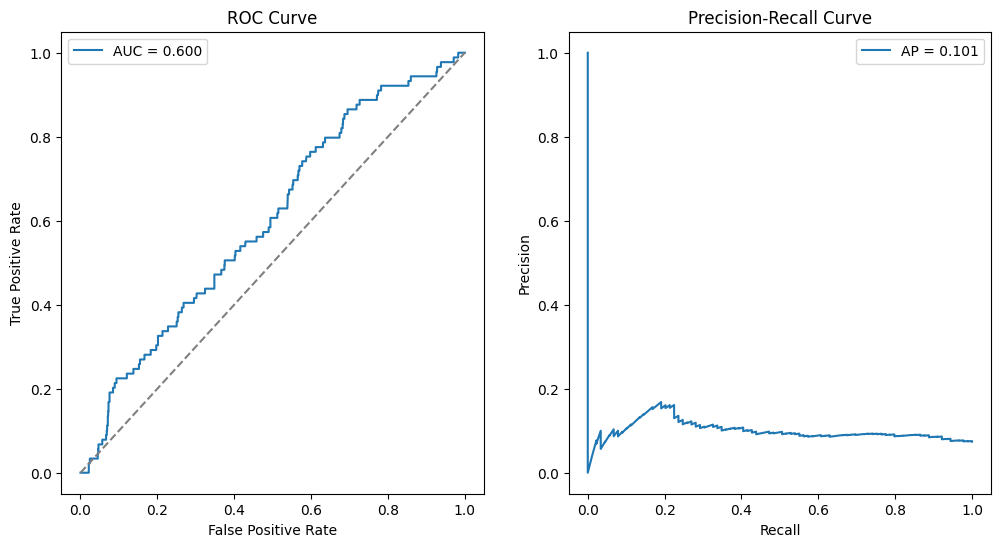

In [32]:

# Find the best cutoff ratio for each model based on the validation set
for clf, predictors in zip([clf_full, clf_best, clf_rfm], [predictors_full, predictors_best, predictors_rfm]):
    y_pred_prob = clf.predict_proba(X_val[predictors])[:, 1]
    # Set the best cut-off ratio
    cut_off_ratio = 0.5


    y_pred = (y_pred_prob >= cut_off_ratio).astype(int)

    # Compute the ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
    auc = roc_auc_score(y_val, y_pred_prob)

    # Compute the Precision-Recall curve and AP
    precision, recall, thresholds = precision_recall_curve(y_val, y_pred_prob)
    ap = average_precision_score(y_val, y_pred_prob)

    # Plot the ROC curve and the Precision-Recall curve
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].plot(fpr, tpr, label=f'AUC = {auc:.3f}')
    axes[0].plot([0, 1], [0, 1], '--', color='gray')
    axes[0].set_xlabel('False Positive Rate')
    axes[0].set_ylabel('True Positive Rate')
    axes[0].set_title('ROC Curve')
    axes[0].legend()

    axes[1].plot(recall, precision, label=f'AP = {ap:.3f}')
    axes[1].set_xlabel('Recall')
    axes[1].set_ylabel('Precision')
    axes[1].set_title('Precision-Recall Curve')
    axes[1].legend()

    plt.show()


- The ROC curves along with the AUC score show that the AUC value for all the 3 models with all features, best features and 3 features is about 0.61, 0.59, 0.60

#### 14.Create a markdown cell describing contribution of each group member. With bullet points. I need to know who contributed in answering which part. Also, if multiple person contributes in the same part, make sure it is mentioned clearly. If one helps another is debugging or coding, make sure it is also mentioned.